## **Data Understanding (Eksplorasi Data)**

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [29]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


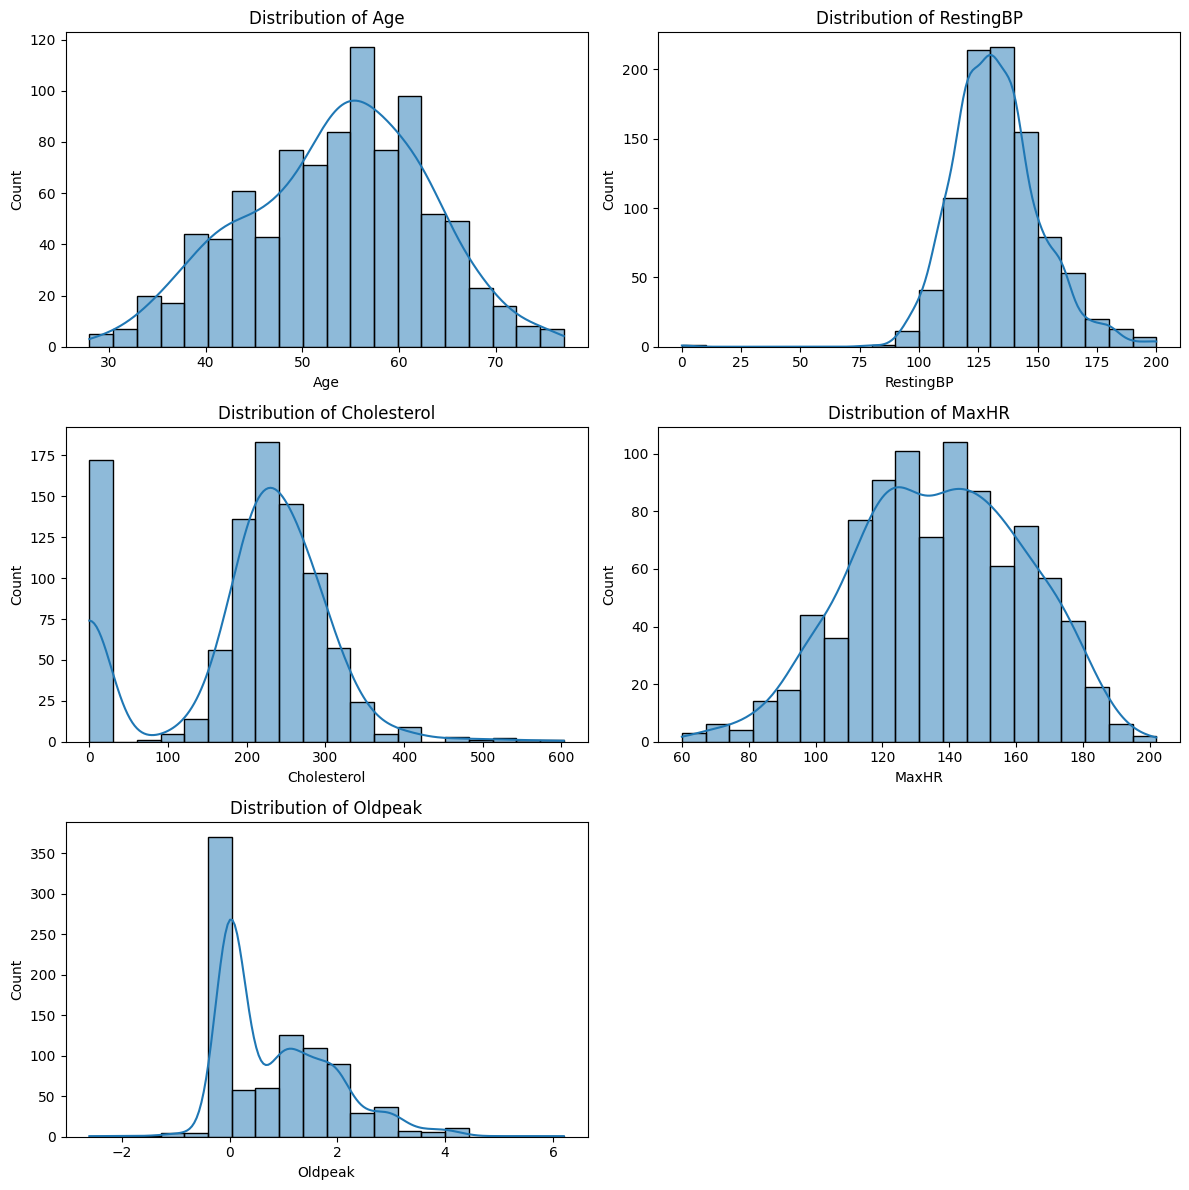

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


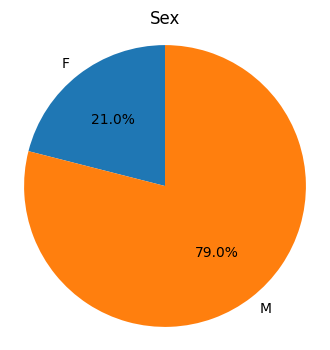

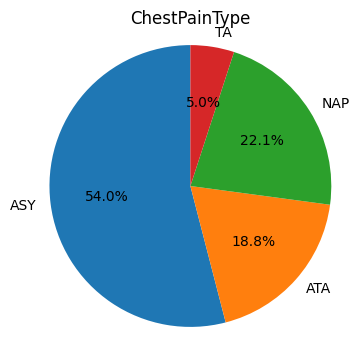

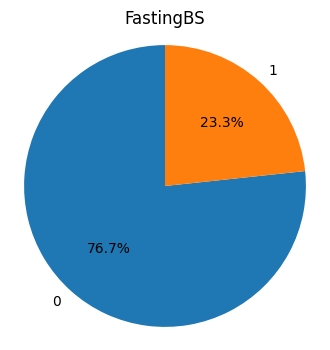

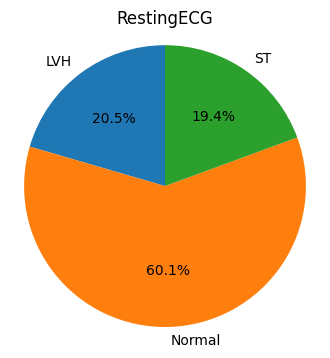

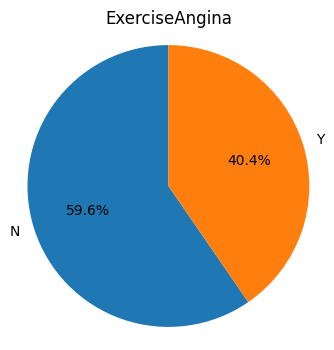

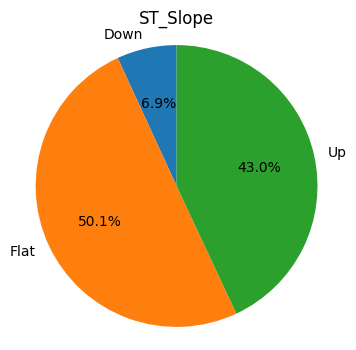

In [31]:
import matplotlib.pyplot as plt

categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    plt.figure(figsize=(4, 4))
    counts = df[column].value_counts().sort_index()
    labels = counts.index.astype(str)
    sizes = counts.values
    percentages = [f'{p:.1f}%' for p in 100 * sizes / sizes.sum()]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{column}')
    plt.axis('equal')
    plt.show()


# **Data Preparation (Cleaning, Encoding, Splitting)**

In [32]:
df = df.drop_duplicates()

In [33]:
df = df.dropna()

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [35]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Train data shape: {X_train.shape}, Test data shape: {X_test.shape}')


Train data shape: (642, 11), Test data shape: (276, 11)


# **Data Modeling (C4.5 Decision Tree dan Naive Bayes)**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
clf_c4_5 = DecisionTreeClassifier(random_state=42)
clf_c4_5.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
clf_naive_bayes = GaussianNB()
clf_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred_c4_5 = clf_c4_5.predict(X_test)
y_pred_naive_bayes = clf_naive_bayes.predict(X_test)

# **Model Evaluation (Evaluasi Model)**

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [42]:
acc_c4_5 = accuracy_score(y_test, y_pred_c4_5)
acc_nb = accuracy_score(y_test, y_pred_naive_bayes)

In [43]:
cm_c4_5 = confusion_matrix(y_test, y_pred_c4_5)
cm_nb = confusion_matrix(y_test, y_pred_naive_bayes)

In [44]:
report_c4_5 = classification_report(y_test, y_pred_c4_5)
report_nb = classification_report(y_test, y_pred_naive_bayes)

In [45]:
fpr_c4_5, tpr_c4_5, _ = roc_curve(y_test, clf_c4_5.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, clf_naive_bayes.predict_proba(X_test)[:, 1])


In [46]:
auc_c4_5 = roc_auc_score(y_test, clf_c4_5.predict_proba(X_test)[:, 1])
auc_nb = roc_auc_score(y_test, clf_naive_bayes.predict_proba(X_test)[:, 1])

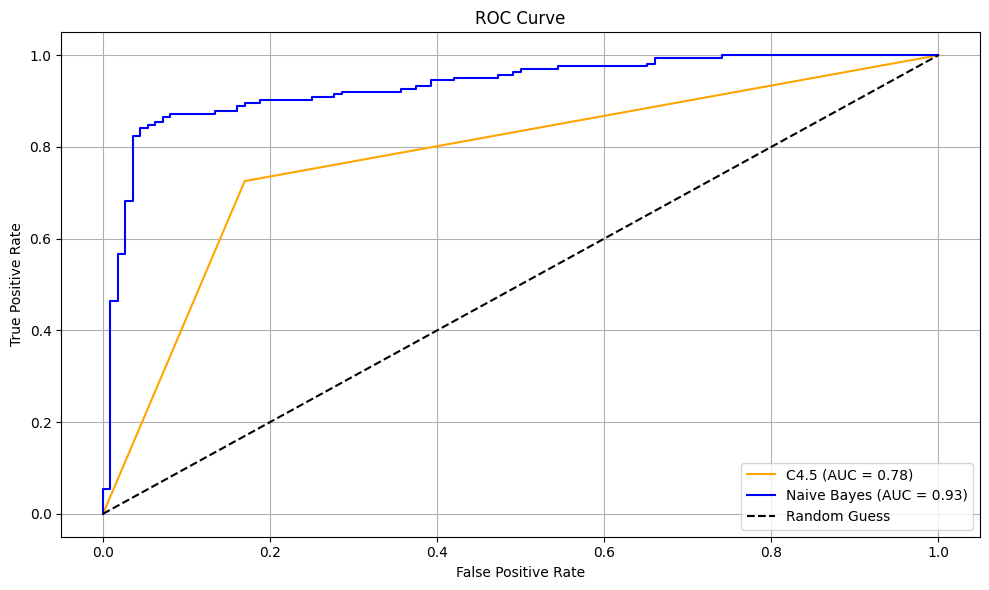

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_c4_5, tpr_c4_5, label=f'C4.5 (AUC = {auc_c4_5:.2f})', color='orange')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

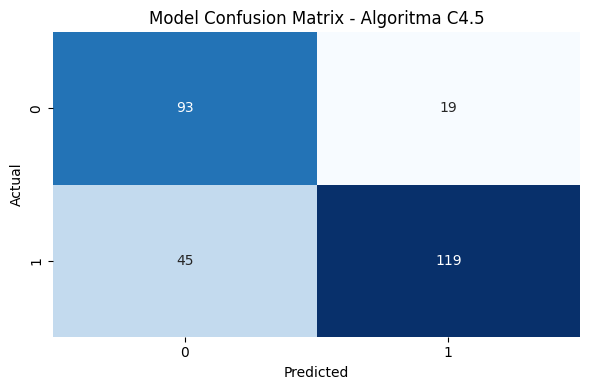

In [48]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_c4_5, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model Confusion Matrix - Algoritma C4.5')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

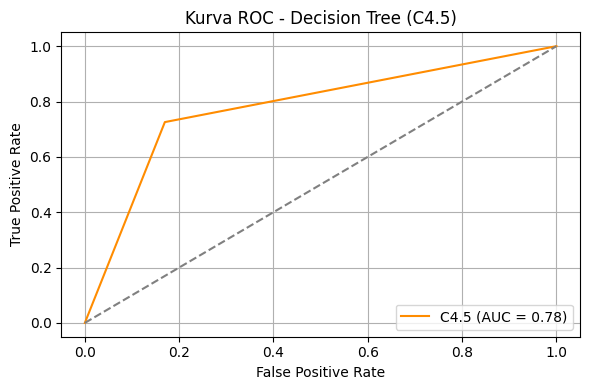

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_c4_5, tpr_c4_5, label=f'C4.5 (AUC = {auc_c4_5:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Decision Tree (C4.5)')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

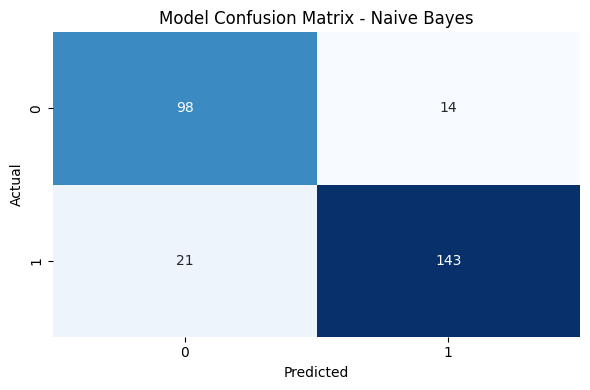

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Model Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

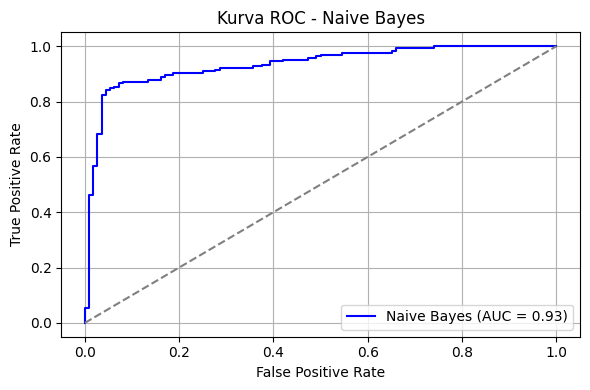

In [51]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC - Naive Bayes')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# **Deployment**

In [52]:
import joblib

# Simpan model C4.5 yang sudah dilatih
joblib.dump(clf_c4_5, "heart_model.pkl")


['heart_model.pkl']

In [53]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

st.set_page_config(page_title="Prediksi Risiko Penyakit Jantung", page_icon="❤️")
st.title("❤️ Prediksi Risiko Penyakit Jantung")
st.write("Aplikasi ini membantu memprediksi apakah seseorang berisiko terkena penyakit jantung berdasarkan data kesehatan sederhana.")

# Input User
st.header("📋 Masukkan Data Pasien")

age = st.number_input("Umur", min_value=1, max_value=120, value=50)
sex = st.selectbox("Jenis Kelamin", ["Laki-laki", "Perempuan"])
cp_type = st.selectbox("Jenis Nyeri Dada", ["ATA", "NAP", "ASY", "TA"])
resting_bp = st.number_input("Tekanan Darah Saat Istirahat (mmHg)", min_value=80, max_value=200, value=120)
chol = st.number_input("Kolesterol (mg/dL)", min_value=100, max_value=600, value=200)
fasting_bs = st.radio("Apakah gula darah puasa > 120 mg/dL?", ["Ya", "Tidak"])
rest_ecg = st.selectbox("Hasil EKG Saat Istirahat", ["Normal", "ST", "LVH"])
max_hr = st.number_input("Detak Jantung Maksimum (BPM)", min_value=60, max_value=250, value=150)
ex_angina = st.radio("Nyeri Dada Saat Olahraga?", ["Ya", "Tidak"])
oldpeak = st.number_input("Oldpeak (Penurunan ST)", min_value=0.0, max_value=6.0, value=1.0)
st_slope = st.selectbox("Kemiringan ST Saat Olahraga", ["Up", "Flat", "Down"])

# Label encoding sesuai data model
def encode_inputs():
    return pd.DataFrame({
        'Age': [age],
        'Sex': [1 if sex == "Laki-laki" else 0],
        'ChestPainType': [{"ATA": 0, "NAP": 1, "ASY": 2, "TA": 3}[cp_type]],
        'RestingBP': [resting_bp],
        'Cholesterol': [chol],
        'FastingBS': [1 if fasting_bs == "Ya" else 0],
        'RestingECG': [{"Normal": 0, "ST": 1, "LVH": 2}[rest_ecg]],
        'MaxHR': [max_hr],
        'ExerciseAngina': [1 if ex_angina == "Ya" else 0],
        'Oldpeak': [oldpeak],
        'ST_Slope': [{"Up": 0, "Flat": 1, "Down": 2}[st_slope]]
    })

# Load model
@st.cache_resource
def load_model():
    return joblib.load("heart_model.pkl")  # pastikan model ini sudah kamu simpan

model = load_model()

# Tombol Prediksi
if st.button("🔍 Prediksi Sekarang"):
    input_df = encode_inputs()
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]

    st.subheader("🧠 Hasil Prediksi")
    if prediction == 1:
        st.error(f"⚠️ Anda kemungkinan **berisiko terkena penyakit jantung**. (Skor Probabilitas: {probability:.2f})")
        st.write("👉 Disarankan untuk konsultasi ke dokter dan mulai gaya hidup sehat.")
    else:
        st.success(f"✅ Anda kemungkinan **tidak berisiko** terkena penyakit jantung. (Skor Probabilitas: {probability:.2f})")
        st.write("👍 Tetap jaga pola makan, olahraga rutin, dan periksa kesehatan secara berkala.")

st.markdown("---")
st.caption("Model ini dibuat hanya untuk tujuan edukasi dan tidak menggantikan diagnosis medis profesional.")


DeltaGenerator()

In [54]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)